# Laboratorio 4 - Inteligencia Artificial

In [11]:
import numpy as np
from math import *
import random as rd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Task 1.1

In [2]:
#data = np.genfromtxt("./kc_house_data.csv", delimiter=",",names=True, dtype=None, encoding=None)
data = pd.read_csv("./kc_house_data.csv")

##### Se leyó el archivo csv utilizando la librería numpy. La data esta delimitada por ','

## Task 1.2

In [3]:
Y = np.array(data["price"])
X = np.array(data["sqft_living"])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Se dividió la data en training y en testing, con porcentajes de 80% training y 20% testing.

In [8]:
# se calcula la matriz 
def matriz_pol(datos, k):
    X = []
    for i in range(len(datos)):
        temp = []
        for j in range(k+1):
            temp.append(datos[i]**j)
        X.append(temp)

    X = np.array(X)
    return X

# se crea W
def w_pol(k):
    
    W = []    
    for i in range(k+1):
        W.append(rd.randint(0, 100))        
    W = np.array(W)
    return W

Se crearon las funciones para poder convertir los datos en forma matricial y así poder aplicar la regresión.
- matriz_pol() crea una matriz con los valores de X pero elevados a la potencia que se recibe como parametro de la forma [xi^0, xi^1, ... xi^k]
- w_pol() crea la matriz de pesos iniciales con valores aleatorios de 0 a 100.


## Task 1.3

Implementación vectorial del algoritmo de regresión lineal.

In [9]:
# Building the model
def crear_modelo(X_data, Y_data, polinomio, learning):
    x = matriz_pol(X_data, polinomio) # X de forma de matriz de grado 1
    y = np.array(Y_data) 
    x_trans = x.transpose() # X transpuesta
    w = w_pol(polinomio) # W con valores aleatorios

    w_t = w.transpose()
    t = np.dot(w_t, x_trans)

    error = 0
    L = learning # The learning Rate
    epochs = 10000 # The number of iterations

    n = len(X_data)
    # Performing Gradient Descent 
    for i in range(epochs): 

        y_pred = np.dot(x, w)
        y_y = np.subtract(y, y_pred)
        x_y = np.dot(x_trans, y_y)
        n_x_y = np.dot((-2/n),  x_y)
        l_n_x_y = np.dot(L, n_x_y)
        w = w - l_n_x_y

        error = (1/n) * np.dot((t - np.dot(x, w)).transpose(), (t - np.dot(x, w)))
    
    return w, error, x 



Seo la funcion crear_modelo() que recibe la data en X, Y, el grado del polinomio y el Learning Rate. Se utiliza el algoritmo de gradient descent para modificar los pesos en cada iteración y así encontrar un peso final con las iteraciones y el learning rate seleccionado. Asimismo se calcula el error para luego ser analizado.

## Task 1.4

In [10]:
# Se dividen la data de training en 5 subarrays
subarrays = np.array_split(X_train, 5)
subarrays_y = np.array_split(Y_train, 5)

# Se guardan los valores del learning rate que mejor se adaptan a las regresiones
L1 = 0.00000012
L2 = 0.000000000000012
L3 = 0.00000000000000000000012
L = [L1, L2, L3]

for i in range(3):
    w1, error1, x1 = crear_modelo(subarrays[0], subarrays_y[0], i+1, L[i])
    w2, error2, x2 = crear_modelo(subarrays[1], subarrays_y[1], i+1, L[i])
    w3, error3, x3 = crear_modelo(subarrays[2], subarrays_y[2], i+1, L[i])
    w4, error4, x4 = crear_modelo(subarrays[3], subarrays_y[3], i+1, L[i])
    w5, error5, x5 = crear_modelo(subarrays[4], subarrays_y[4], i+1, L[i])

    error = (error1+error2+error3+error4+error5)/5
    print("Error para el polinomio de grado ", i+1, " y learning rate ", L[i], " es: ", error)



Error para el polinomio de grado  1  y learning rate  1.2e-07  es:  209804409130.72534
Error para el polinomio de grado  2  y learning rate  1.2e-14  es:  1.54255589656367e+17
Error para el polinomio de grado  3  y learning rate  1.2e-22  es:  5.844243984891236e+24


## Task 1.5


Luego de separar la data en 5 folds, y calcular el error con los 3 polinomios seleccionados, se encontró el promedio por cada polinomio y se llegó a la conclusión que aunque es alto, el polinomio que mejor se ajusta es el de grado 1.

El coeficiente de determinación r^2 es de:  0.4913090024381399


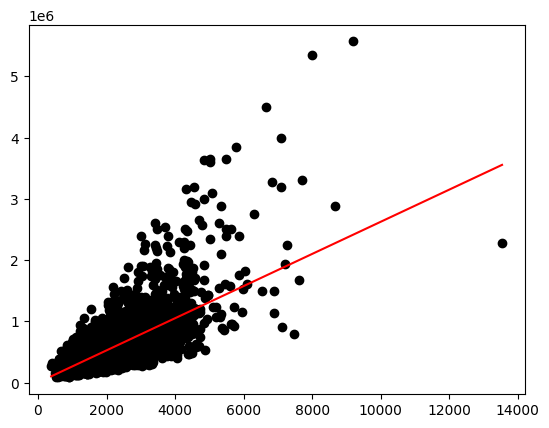

In [20]:

L1 = 0.00000012

w, error, x = crear_modelo(X_train, Y_train, 1, L1)

x = matriz_pol(X_test, 1)
Y = np.dot(x, w)

max_indx = np.unravel_index(np.argmax(Y), Y.shape)
min_indx = np.unravel_index(np.argmin(Y), Y.shape)

x_maximo = x[max_indx]
x_minimo = x[min_indx]
y_maximo = Y[max_indx]
y_minimo = Y[min_indx]

x = [x_maximo[1], x_minimo[1]]
y = [y_maximo, y_minimo]

plt.plot(X_test, Y_test, 'o', color='black')
plt.plot(x, y, color='red')

score = r2_score(Y_test, Y)
print("El coeficiente de determinación r^2 es de: ", score)


Luego de tomar el polinomio con el menor error, calculamos con todo el dataset de training los pesos para que, utilizando estos valores pudieramos encontrar los valores en y predichos con el data set de testing. Estos valores se graficaron y luego se encontró el coeficiente de correlación para ver si se ajusta a los valores reales. Dicho coeficiente dio un resultado de 0.49 indicando que aunque no se ajusta perfectamente, si tiene correlación con los datos reales.